In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
%load_ext sql
%sql sqlite:///Diamonds

In [3]:
db = %sql select * from Diamond
db = db.DataFrame()
db = db.set_index("id")

 * sqlite:///Diamonds
Done.


In [4]:
db[:5]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [5]:
db.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+01, 8.000e+00, 1.500e+01,
        2.600e+01, 2.000e+01, 6.500e+01, 5.500e+01, 1.250e+02, 2.390e+02,
        2.500e+02, 4.630e+02, 4.630e+02, 9.040e+02, 1.191e+03, 1.254e+03,
        2.058e+03, 2.111e+03, 4.135e+03, 5.404e+03, 4.849e+03, 5.830e+03,
        3.250e+03, 3.026e+03, 1.877e+03, 1.017e+03, 6.400e+02, 2.500e+02,
        2.390e+02, 1.730e+02, 1.060e+02, 1.130e+02, 5.500e+01, 5.000e+01,
        4.700e+01, 1.800e+01, 2.800e+01, 9.000e+00, 1.600e+01, 1.200e+01,
        5.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+0

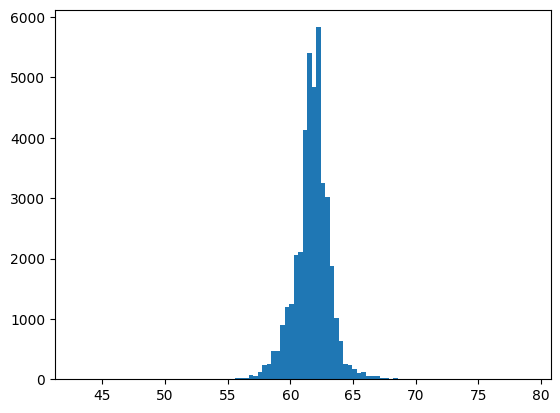

In [6]:
plt.hist(db["depth"], bins = 100)

(array([  33.,   25.,   36.,   36.,   61.,   71.,    0.,   71.,   86.,
          76.,   88.,  115.,   83.,    0.,  105.,  160.,  139.,  141.,
         183.,    0.,  212.,  211.,  227.,  254.,  272.,  264.,    0.,
         315.,  340.,  386.,  401.,  467.,  448.,    0.,  468.,  534.,
         608.,  660.,  656.,    0.,  795.,  926.,  964., 1065., 1180.,
        1207.,    0., 1286., 1449., 1462., 1578., 1594., 1677.,    0.,
        1500., 1506., 1465., 1359., 1143.,    0., 1126.,  981.,  928.,
         827.,  654.,  617.,    0.,  509.,  521.,  455.,  392.,  360.,
         323.,    0.,  334.,  216.,  167.,  131.,  126.,    0.,  107.,
          60.,   83.,   76.,   53.,   49.,    0.,   61.,   42.,   52.,
          40.,   39.,   34.,    0.,   46.,   26.,   29.,   38.,   24.,
          22.]),
 array([57.5  , 57.585, 57.67 , 57.755, 57.84 , 57.925, 58.01 , 58.095,
        58.18 , 58.265, 58.35 , 58.435, 58.52 , 58.605, 58.69 , 58.775,
        58.86 , 58.945, 59.03 , 59.115, 59.2  , 59.285, 59

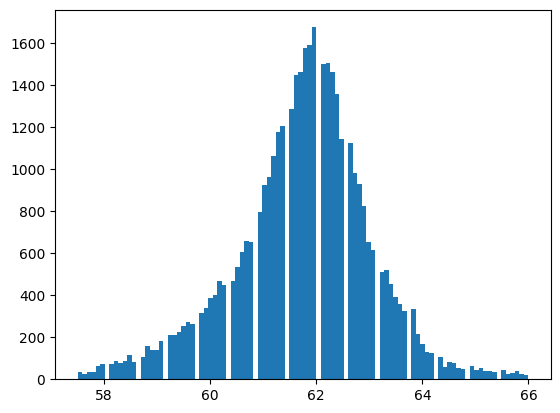

In [7]:
db2 = db[(np.abs(stats.zscore(db['depth'])) < 3)]
plt.hist(db2["depth"], bins = 100)

(array([1.182e+03, 8.697e+03, 3.423e+03, 4.709e+03, 8.990e+02, 4.271e+03,
        9.720e+02, 1.975e+03, 4.853e+03, 1.856e+03, 1.819e+03, 7.930e+02,
        2.570e+02, 1.827e+03, 6.120e+02, 4.380e+02, 1.660e+02, 3.700e+01,
        6.820e+02, 4.700e+02, 2.060e+02, 9.900e+01, 6.700e+01, 4.100e+01,
        4.800e+01, 1.300e+01, 8.000e+00, 2.000e+00, 0.000e+00, 2.200e+01,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.2   , 0.2962, 0.3924, 0.4886, 0.5848, 0.681 , 0.7772, 0.8734,
        0.9696, 1.0658, 1.162 , 1.2582, 1.3544, 1.4506, 1.5468, 1.643 ,
        1.7392, 1.8354, 1.9316, 2.0278, 2.124 , 2.2202, 2.3164, 2.4126,
        2.5088, 2.605 , 2.7012, 2.7974, 2.8936, 2.9898, 3.086 , 3.1822,
        3.2784, 3.3746, 3.4708, 3.567 , 3.6632, 3.7594, 3.8556, 3.9518,
        4.048 , 

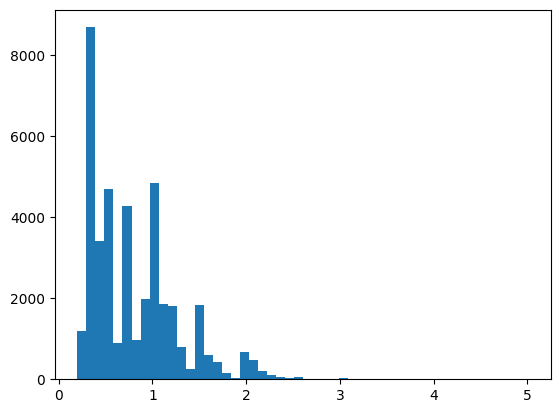

In [8]:
plt.hist(db["carat"], bins = 50)

(array([ 419.,  662., 5145., 2533., 2064., 2110.,  310., 2373., 1756.,
         906.,  382.,  139., 3030.,  982.,  656.,  399.,  105., 1658.,
         252., 1155., 3001.,  987.,  830.,  584.,  725.,  938.,  449.,
         324.,  197.,  125.,   77.,   48., 1458.,  465.,  294.,  151.,
          76.,  321.,  131.,   47.,   27.,   13.,   17.,    9.,  200.,
         606.,  173.,  128.,   85.,   93.]),
 array([0.2   , 0.2402, 0.2804, 0.3206, 0.3608, 0.401 , 0.4412, 0.4814,
        0.5216, 0.5618, 0.602 , 0.6422, 0.6824, 0.7226, 0.7628, 0.803 ,
        0.8432, 0.8834, 0.9236, 0.9638, 1.004 , 1.0442, 1.0844, 1.1246,
        1.1648, 1.205 , 1.2452, 1.2854, 1.3256, 1.3658, 1.406 , 1.4462,
        1.4864, 1.5266, 1.5668, 1.607 , 1.6472, 1.6874, 1.7276, 1.7678,
        1.808 , 1.8482, 1.8884, 1.9286, 1.9688, 2.009 , 2.0492, 2.0894,
        2.1296, 2.1698, 2.21  ]),
 <BarContainer object of 50 artists>)

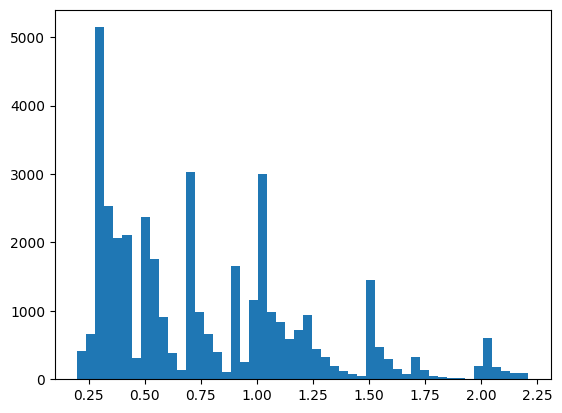

In [9]:
db2 = db2[np.abs(stats.zscore(db2["carat"])) < 3]
plt.hist(db2["carat"], bins = 50)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        5.000e+00, 4.700e+01, 4.260e+02, 2.069e+03, 4.917e+03, 7.515e+03,
        7.338e+03, 6.363e+03, 4.939e+03, 3.239e+03, 1.743e+03, 9.720e+02,
        4.370e+02, 1.970e+02, 1.100e+02, 6.500e+01, 3.400e+01, 1.100e+01,
        8.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([44.  , 45.02, 46.04, 47.06, 48.08, 49.1 , 50.12, 51.14, 52.16,
        53.18, 54.2 , 55.22, 56.24, 57.26, 58.28, 59.3 , 60.32, 61.34,
        62.36, 63.38, 64.4 , 65.42, 66.44, 67.46, 68.48, 69.5 , 70.52,
        71.54, 72.56, 73.58, 74.6 , 75.62, 76.64, 77.66, 78.68, 79.7 ,
        80.72, 81.74, 82.76, 83.78, 84.8 , 85.82, 86.84, 87.86, 88.88,
        89.9 , 90.92,

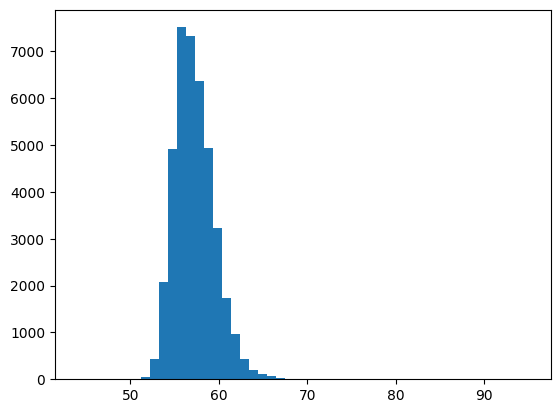

In [10]:
plt.hist(db["table"], bins = 50)

(array([  50.,  414., 2041., 4849., 7443., 7235., 6249., 4842., 3162.,
        1675.,  902.,  396.]),
 array([51.        , 52.04166667, 53.08333333, 54.125     , 55.16666667,
        56.20833333, 57.25      , 58.29166667, 59.33333333, 60.375     ,
        61.41666667, 62.45833333, 63.5       ]),
 <BarContainer object of 12 artists>)

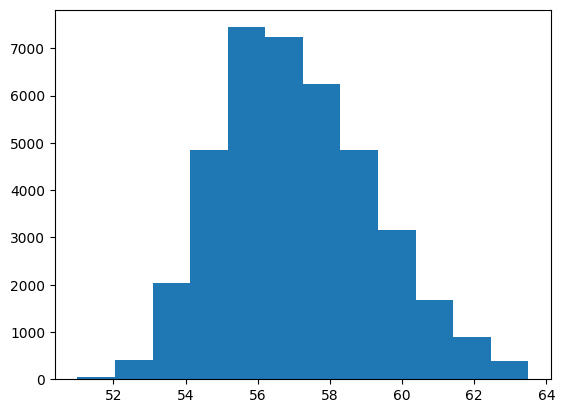

In [11]:
db2 = db2[np.abs(stats.zscore(db2["table"])) < 3]
plt.hist(db2["table"], bins = 12)

(array([7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01,
        5.750e+02, 1.594e+03, 5.577e+03, 2.617e+03, 2.680e+03, 1.963e+03,
        2.811e+03, 1.094e+03, 3.141e+03, 1.839e+03, 1.777e+03, 3.056e+03,
        3.097e+03, 2.202e+03, 1.309e+03, 1.013e+03, 1.455e+03, 7.350e+02,
        3.310e+02, 6.750e+02, 5.040e+02, 2.220e+02, 8.600e+01, 3.900e+01,
        1.200e+01, 1.300e+01, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.    ,  0.2148,  0.4296,  0.6444,  0.8592,  1.074 ,  1.2888,
         1.5036,  1.7184,  1.9332,  2.148 ,  2.3628,  2.5776,  2.7924,
         3.0072,  3.222 ,  3.4368,  3.6516,  3.8664,  4.0812,  4.296 ,
         4.5108,  4.7256,  4.9404,  5.1552,  5.37  ,  5.5848,  5.7996,
         6.0144,  6.2292,  6.444 ,  6.6588,  6.8736,  7.0884,  7.3032,
         7.518 ,  7.7

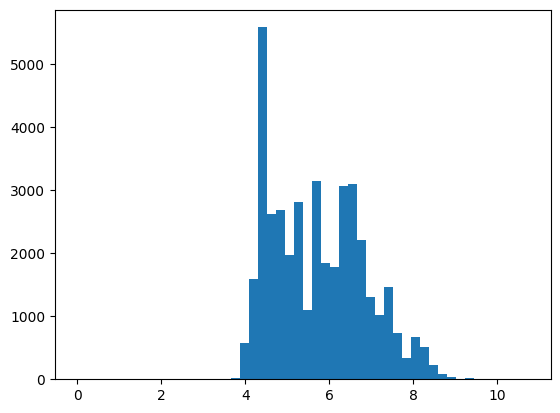

In [12]:
plt.hist(db["x"], bins = 50)

(array([  11.,   84.,  311.,  285.,  344., 1697., 3092., 1790., 1130.,
        1259., 1881.,  894.,  378.,  803., 1613., 1276.,  969.,  544.,
         350.,  957., 1817., 1142.,  678.,  502.,  864.,  846., 1030.,
        1814., 1635., 1201.,  928.,  972.,  818.,  578.,  298.,  362.,
         710.,  740.,  500.,  391.,  244.,  165.,  124.,  170.,  341.,
         345.,  201.,  116.,   42.,   10.]),
 array([3.73  , 3.8274, 3.9248, 4.0222, 4.1196, 4.217 , 4.3144, 4.4118,
        4.5092, 4.6066, 4.704 , 4.8014, 4.8988, 4.9962, 5.0936, 5.191 ,
        5.2884, 5.3858, 5.4832, 5.5806, 5.678 , 5.7754, 5.8728, 5.9702,
        6.0676, 6.165 , 6.2624, 6.3598, 6.4572, 6.5546, 6.652 , 6.7494,
        6.8468, 6.9442, 7.0416, 7.139 , 7.2364, 7.3338, 7.4312, 7.5286,
        7.626 , 7.7234, 7.8208, 7.9182, 8.0156, 8.113 , 8.2104, 8.3078,
        8.4052, 8.5026, 8.6   ]),
 <BarContainer object of 50 artists>)

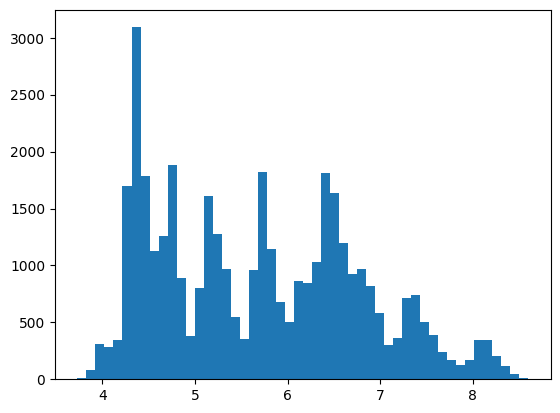

In [13]:
db2 = db2[np.abs(stats.zscore(db2["x"])) < 3]
plt.hist(db2["x"], bins = 50)

(array([6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0062e+04, 1.2917e+04,
        1.2365e+04, 4.5010e+03, 5.9500e+02, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.178,  2.356,  3.534,  4.712,  5.89 ,  7.068,  8.246,
         9.424, 10.602, 11.78 , 12.958, 14.136, 15.314, 16.492, 17.67 ,
        18.848, 20.026, 21.204, 22.382, 23.56 , 24.738, 25.916, 27.094,
        28.272, 29.45 , 30.628, 31.806, 32.984, 34.162, 35.34 , 36.518,
        37.696, 38.874, 40.052

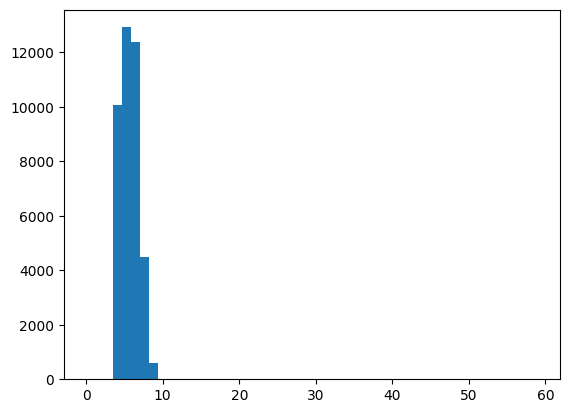

In [14]:
plt.hist(db["y"], bins = 50)

(array([   7.,   15.,  140.,  324.,  303.,  601., 2650., 2760., 1354.,
         988., 1598., 1718.,  506.,  403., 1258., 1565., 1129.,  751.,
         461.,  557., 1211., 1714.,  930.,  641.,  660.,  840.,  971.,
        1608., 1745., 1260., 1113.,  974.,  917.,  597.,  458.,  305.,
         535.,  712.,  633.,  471.,  317.,  151.,  156.,  156.,  274.,
         330.,  262.,  151.,   48.,   22.]),
 array([3.68  , 3.7776, 3.8752, 3.9728, 4.0704, 4.168 , 4.2656, 4.3632,
        4.4608, 4.5584, 4.656 , 4.7536, 4.8512, 4.9488, 5.0464, 5.144 ,
        5.2416, 5.3392, 5.4368, 5.5344, 5.632 , 5.7296, 5.8272, 5.9248,
        6.0224, 6.12  , 6.2176, 6.3152, 6.4128, 6.5104, 6.608 , 6.7056,
        6.8032, 6.9008, 6.9984, 7.096 , 7.1936, 7.2912, 7.3888, 7.4864,
        7.584 , 7.6816, 7.7792, 7.8768, 7.9744, 8.072 , 8.1696, 8.2672,
        8.3648, 8.4624, 8.56  ]),
 <BarContainer object of 50 artists>)

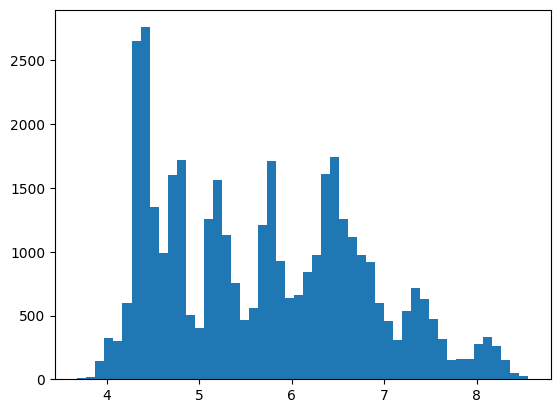

In [15]:
db2 = db2[np.abs(stats.zscore(db2["y"])) < 3]
plt.hist(db2["y"], bins = 50)

(array([1.7000e+01, 1.0000e+00, 0.0000e+00, 7.1200e+02, 1.3991e+04,
        1.0162e+04, 1.0980e+04, 3.9890e+03, 5.7800e+02, 2.0000e+01,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  0.636,  1.272,  1.908,  2.544,  3.18 ,  3.816,  4.452,
         5.088,  5.724,  6.36 ,  6.996,  7.632,  8.268,  8.904,  9.54 ,
        10.176, 10.812, 11.448, 12.084, 12.72 , 13.356, 13.992, 14.628,
        15.264, 15.9  , 16.536, 17.172, 17.808, 18.444, 19.08 , 19.716,
        20.352, 20.988, 21.624

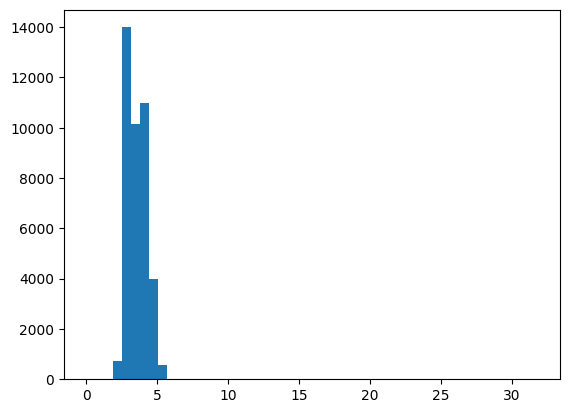

In [16]:
plt.hist(db["z"], bins = 50)

(array([6.000e+00, 2.100e+01, 8.600e+01, 3.070e+02, 2.690e+02, 4.300e+02,
        1.296e+03, 3.299e+03, 2.294e+03, 1.068e+03, 1.119e+03, 1.724e+03,
        9.860e+02, 3.880e+02, 7.170e+02, 1.818e+03, 1.537e+03, 7.200e+02,
        4.470e+02, 4.140e+02, 1.056e+03, 1.848e+03, 9.900e+02, 5.490e+02,
        5.160e+02, 7.810e+02, 1.171e+03, 1.151e+03, 1.989e+03, 1.753e+03,
        1.024e+03, 8.350e+02, 9.850e+02, 7.820e+02, 3.720e+02, 2.820e+02,
        4.200e+02, 7.580e+02, 8.120e+02, 3.780e+02, 2.550e+02, 2.480e+02,
        1.150e+02, 1.550e+02, 2.570e+02, 3.970e+02, 2.540e+02, 1.140e+02,
        4.500e+01, 1.000e+00]),
 array([2.24  , 2.3012, 2.3624, 2.4236, 2.4848, 2.546 , 2.6072, 2.6684,
        2.7296, 2.7908, 2.852 , 2.9132, 2.9744, 3.0356, 3.0968, 3.158 ,
        3.2192, 3.2804, 3.3416, 3.4028, 3.464 , 3.5252, 3.5864, 3.6476,
        3.7088, 3.77  , 3.8312, 3.8924, 3.9536, 4.0148, 4.076 , 4.1372,
        4.1984, 4.2596, 4.3208, 4.382 , 4.4432, 4.5044, 4.5656, 4.6268,
        4.688 , 

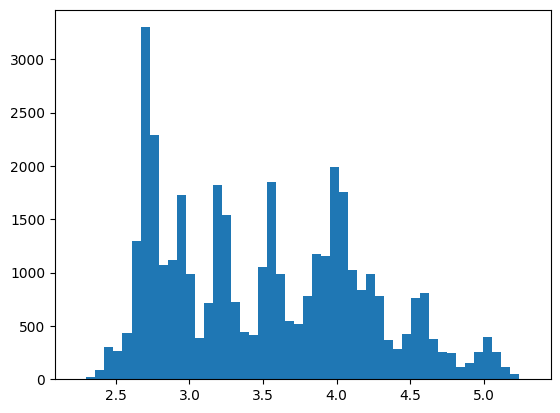

In [17]:
db2 = db2[np.abs(stats.zscore(db2["z"])) < 3]
plt.hist(db2["z"], bins = 50)

(array([  16.,   85.,  169.,  400.,  503.,  638.,  822.,  939., 1143.,
        1315., 1313., 1345., 1225., 1310., 1150.,  831.,  771.,  705.,
         388.,  772., 1059., 1005.,  864.,  821., 1051.,  916.,  980.,
         808.,  871.,  853.,  996., 1226., 1311., 1221., 1088.,  941.,
         951.,  797.,  802.,  646.,  704.,  633.,  589.,  617.,  511.,
         526.,  483.,  464.,  459.,  422.]),
 array([5.787 , 5.8681, 5.9492, 6.0303, 6.1114, 6.1925, 6.2736, 6.3547,
        6.4358, 6.5169, 6.598 , 6.6791, 6.7602, 6.8413, 6.9224, 7.0035,
        7.0846, 7.1657, 7.2468, 7.3279, 7.409 , 7.4901, 7.5712, 7.6523,
        7.7334, 7.8145, 7.8956, 7.9767, 8.0578, 8.1389, 8.22  , 8.3011,
        8.3822, 8.4633, 8.5444, 8.6255, 8.7066, 8.7877, 8.8688, 8.9499,
        9.031 , 9.1121, 9.1932, 9.2743, 9.3554, 9.4365, 9.5176, 9.5987,
        9.6798, 9.7609, 9.842 ]),
 <BarContainer object of 50 artists>)

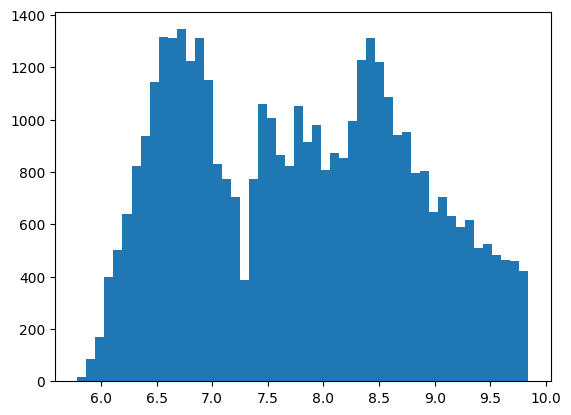

In [18]:
plt.hist(db["price"], bins = 50)

(array([  16.,   81.,  167.,  399.,  496.,  635.,  819.,  932., 1135.,
        1311., 1304., 1334., 1221., 1280., 1132.,  806.,  746.,  684.,
         380.,  758., 1040.,  979.,  835.,  792., 1003.,  887.,  937.,
         778.,  844.,  817.,  953., 1177., 1269., 1188., 1063.,  918.,
         927.,  778.,  786.,  629.,  692.,  618.,  579.,  592.,  489.,
         494.,  435.,  408.,  365.,  331.]),
 array([5.787 , 5.8681, 5.9492, 6.0303, 6.1114, 6.1925, 6.2736, 6.3547,
        6.4358, 6.5169, 6.598 , 6.6791, 6.7602, 6.8413, 6.9224, 7.0035,
        7.0846, 7.1657, 7.2468, 7.3279, 7.409 , 7.4901, 7.5712, 7.6523,
        7.7334, 7.8145, 7.8956, 7.9767, 8.0578, 8.1389, 8.22  , 8.3011,
        8.3822, 8.4633, 8.5444, 8.6255, 8.7066, 8.7877, 8.8688, 8.9499,
        9.031 , 9.1121, 9.1932, 9.2743, 9.3554, 9.4365, 9.5176, 9.5987,
        9.6798, 9.7609, 9.842 ]),
 <BarContainer object of 50 artists>)

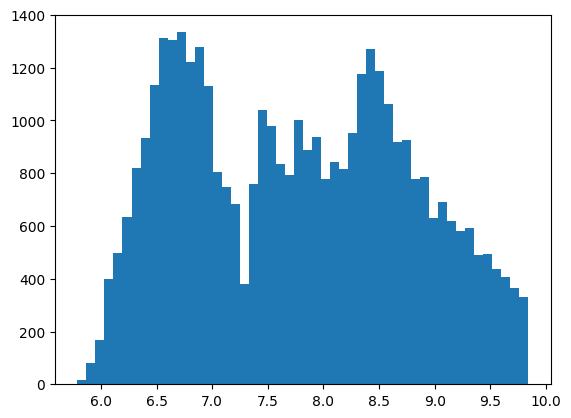

In [19]:
db2 = db2[np.abs(stats.zscore(db2["price"])) < 3]
plt.hist(db2["price"], bins = 50)

(array([10338., 16230.,  9003.,  1202.,  3682.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

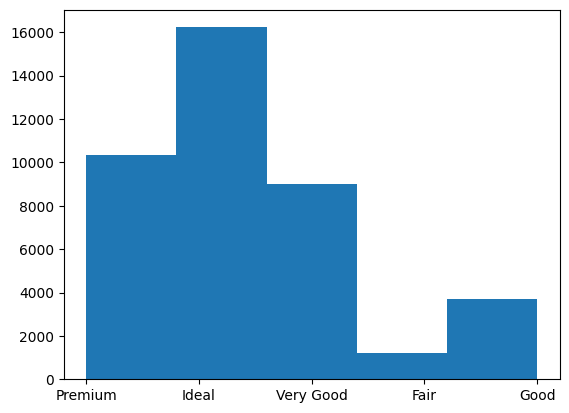

In [20]:
plt.hist(db["cut"], bins = 5)

(array([10191., 16139.,  8932.,   685.,  3292.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

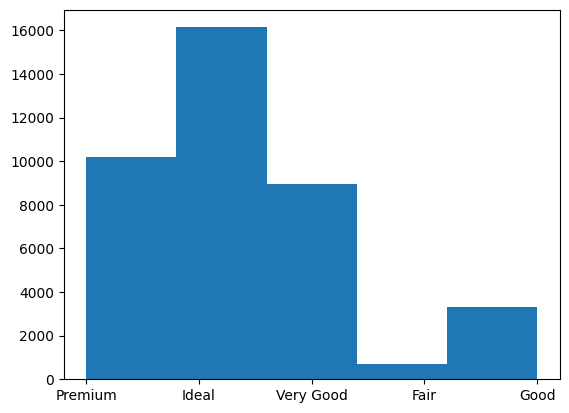

In [24]:
plt.hist(db2["cut"], bins = 5)

(array([5100., 7368., 7182., 8410., 6203., 4070., 2122.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

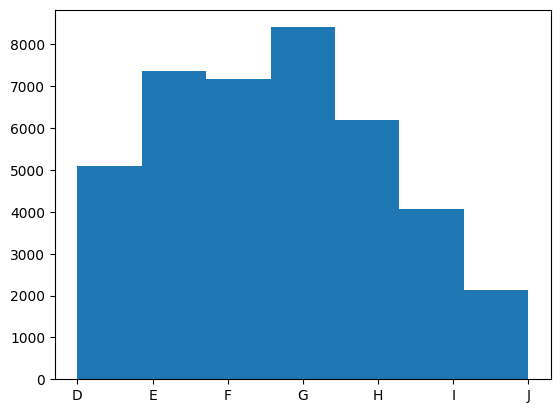

In [21]:
plt.hist(db["color"], bins = 7)

(array([4999., 7192., 7017., 8235., 5969., 3869., 1958.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

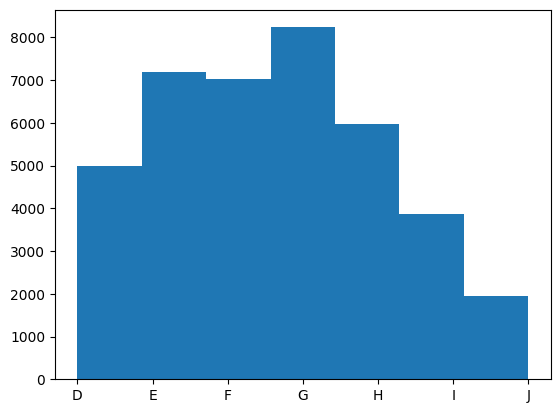

In [26]:
plt.hist(db2["color"], bins = 7)

(array([6921., 3745., 9259., 6079., 9779., 2807., 1312.,  553.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

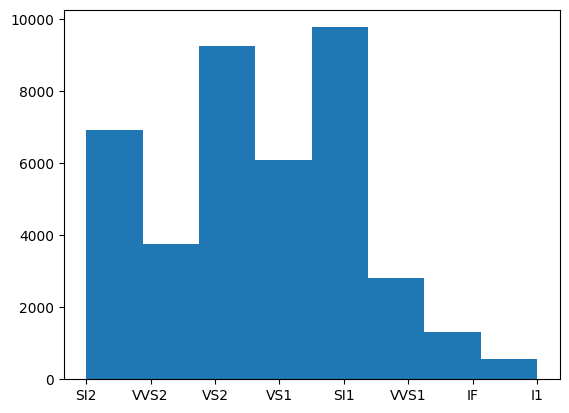

In [22]:
plt.hist(db["clarity"], bins = 8)

(array([6505., 3703., 9078., 5954., 9502., 2780., 1307.,  410.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

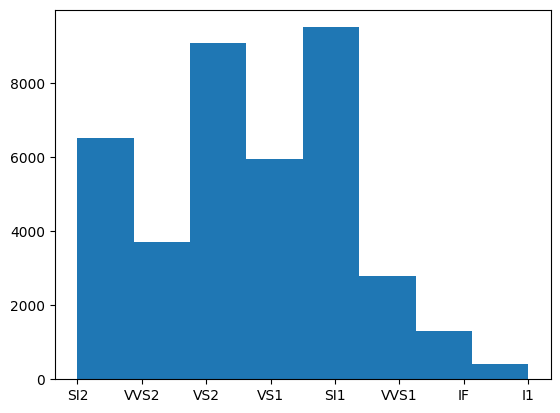

In [27]:
plt.hist(db2["clarity"], bins = 8)

In [31]:
db2[db2["cut"] == "Fair"]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
24,1.00,Fair,F,VS1,65.3,56.0,6.28,6.25,4.09,8.671
266,1.02,Fair,I,SI2,65.5,57.0,6.19,6.24,4.07,8.243
291,1.52,Fair,H,SI1,64.6,55.0,7.24,7.19,4.66,8.914
397,1.04,Fair,G,VS1,64.9,58.0,6.36,6.33,4.12,8.636
449,1.00,Fair,G,I1,64.9,56.0,6.20,6.14,4.01,7.782
...,...,...,...,...,...,...,...,...,...,...
40168,1.00,Fair,F,SI1,61.3,62.0,6.45,6.37,3.93,8.525
40182,0.70,Fair,D,SI2,64.5,60.0,5.53,5.47,3.55,7.681
40186,1.02,Fair,H,SI1,65.5,60.0,6.29,6.22,4.10,8.468


In [32]:
db[db["cut"] == "Fair"]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
22,1.50,Fair,I,SI1,56.7,63.0,7.52,7.57,4.28,8.976
24,1.00,Fair,F,VS1,65.3,56.0,6.28,6.25,4.09,8.671
172,1.47,Fair,H,I1,66.7,59.0,6.98,6.94,4.64,8.497
204,0.30,Fair,E,VVS2,66.6,54.0,4.14,4.18,2.77,6.373
266,1.02,Fair,I,SI2,65.5,57.0,6.19,6.24,4.07,8.243
...,...,...,...,...,...,...,...,...,...,...
40182,0.70,Fair,D,SI2,64.5,60.0,5.53,5.47,3.55,7.681
40186,1.02,Fair,H,SI1,65.5,60.0,6.29,6.22,4.10,8.468
40190,1.01,Fair,F,VS2,69.0,61.0,6.06,5.99,4.16,8.706
